In [1]:
from rbibm.utils.utils_data import query

from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

In [2]:
import torch
torch.manual_seed(0)

In [3]:
name = "benchmark"
df = query(name)

In [4]:
color_map = {0.0001: "C0",0.001: "C1",0.01: "C3",0.1: "C4", 0.5: "C5",1.: "C6", 10.: "C7",100.: "C8"}

In [5]:
task = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]

In [6]:
idxs_final = []

In [7]:
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

In [8]:
ids = query_main(name)

In [9]:
id1 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.001, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=100., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

In [10]:
id1 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

In [11]:
id3

id            task     loss  \
661  0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef  lotka_volterra  NLLLoss   

            defense model_name  N_train  N_val  N_test  train_loss  \
661  L2PGDrKLTrades        maf   100000    512   10000   -5.085491   

     validation_loss  test_loss   train_time  sim_time  seed  
661        -5.089759  -5.132659  8685.868358       NaN     0

In [12]:
id1 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=0.1, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "L2PGDTargetedAdversarialTraining", params_defense_eps=1., N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

In [13]:
id1 = query_main(name, defense = "None",  N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "None", N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "None", N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "None", N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "None",  N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "None", N_train=100000, model_name="maf", task="spatial_sir")

idx_final_with_none = idxs_final + [id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]]

In [14]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }

In [15]:
color_map_defenses = {"None": "#0868ac", "FIMTraceRegularizer": "#8856a7", "L2PGDTargetedAdversarialTraining": "#df65b0", "L2PGDrKLTrades": "#2ca25f"}

In [16]:
defense = ["FIMTraceRegularizer", "L2PGDrKLTrades", "L2PGDTargetedAdversarialTraining"]

{'verbose': False, 'hue': 'defense', 'defense': ['FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining', 'None'], 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e', '7c169e42-8ccb-4421-9659-6f66dd0cdf04', 'c8c42888-c93e-428e-a860-0bcf7203d3e4', '7c497b3c-77b2-4688-8bc8-bc70ec91f068', '0e334762-5f28-4f9

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


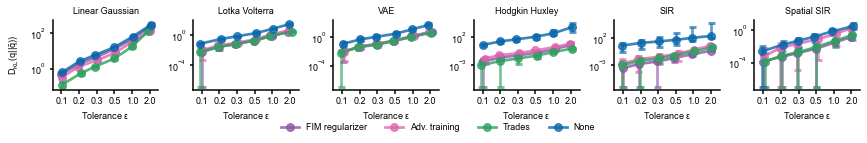

In [17]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, 
                           figsize_per_col=figsize_col, 
                           figsize_per_row=figsize_row_rob, verbose=False, hue="defense", defense=defense + ["None"],id=idx_final_with_none, legend=False,attack="L2PGDAttack", jitter=True,
                                                                                                         expand_params_defense=True, metric_rob="ReverseKLRobMetric", color_map=color_map_defenses, alpha=0.8)   
    axes[0,0].set_ylabel("$D_{KL}(q||\\tilde{q}))$")  
    fig.savefig("main_plot_rob_rKL.svg")
    plt.show()

{'verbose': False, 'defense': ['FIMTraceRegularizer', 'L2PGDrKLTrades', 'L2PGDTargetedAdversarialTraining', 'None'], 'hue': 'defense', 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e', '7c169e42-8ccb-4421-9659-6f66dd0cdf04', 'c8c42888-c93e-428e-a860-0bcf7203d3e4', '7c497b3c-77b2-4688-8bc8-bc70ec91f068', '0e334762-5f28-4f9

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


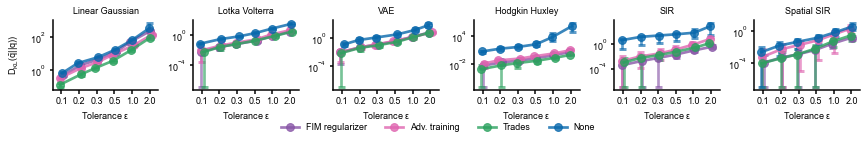

In [18]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot,
                           figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, 
                           verbose=False, defense=defense + ["None"], hue="defense",id=idx_final_with_none, legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ForwardKLRobMetric", color_map=color_map_defenses, jitter=True, alpha=0.8)   
    axes[0,0].set_ylabel("$D_{KL}(\\tilde{q}||q))$")
    fig.savefig("main_plot_rob_fKL.svg")
    plt.show()

{'task': 'gaussian_linear', 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e'], 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'with_grid': False, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack'}
{'task': 'lotka_volterra', 'id': ['df80a10f-c051-465c-a857-c

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


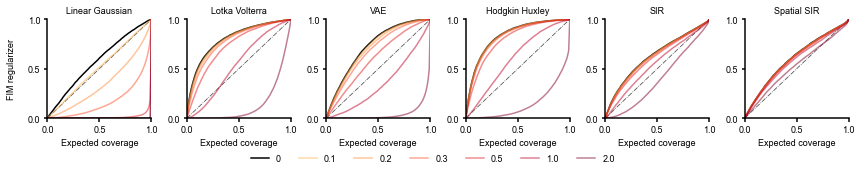

In [19]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "defense", plot_expected_coverage,
    figsize_per_col=figsize_col, figsize_per_row=figsize_row_expected_cov + 0.2, task=task, id=idxs_final,defense="FIMTraceRegularizer",  color_map=color_map_eps,  with_eps=True, with_grid=False, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
    fig.savefig("main_plot_coverage_rKL_FIM.svg")
    plt.show()

{'task': 'gaussian_linear', 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e'], 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'with_grid': False, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack'}
{'task': 'lotka_volterra', 'id': ['df80a10f-c051-465c-a857-c

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


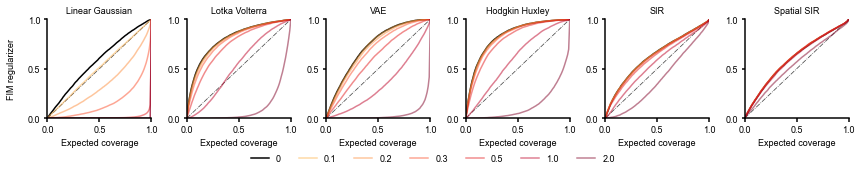

In [20]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "defense", plot_expected_coverage,
    figsize_per_col=figsize_col, figsize_per_row=figsize_row_expected_cov + 0.2, task=task, id=idxs_final,defense="FIMTraceRegularizer",  color_map=color_map_eps,  with_eps=True, with_grid=False, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
    fig.savefig("main_plot_coverage_fKL_FIM.svg")
    plt.show()

{'task': 'gaussian_linear', 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e'], 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack'}
{'task': 'lotka_volterra', 'id': ['df80a10f-c05

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


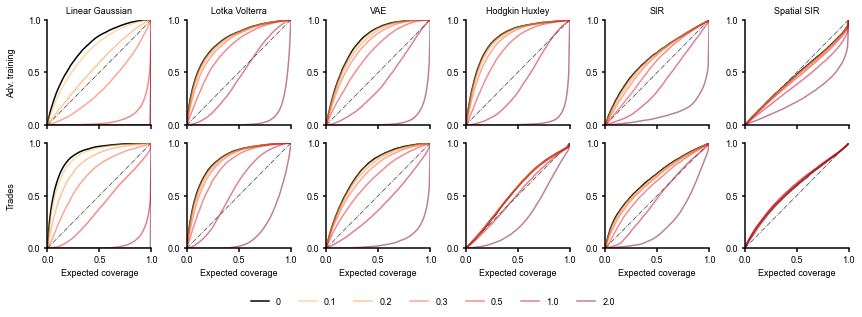

In [21]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "defense", plot_expected_coverage,
    figsize_per_col=figsize_col, figsize_per_row=figsize_row_expected_cov, task=task, id=idxs_final,defense=defense[1:],  color_map=color_map_eps,  with_eps=True, hue="eps", with_grid=False, verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
    fig.savefig("main_plot_coverage_rKL.svg")
    plt.show()

{'task': 'gaussian_linear', 'id': ['df80a10f-c051-465c-a857-cea2ad4a7b39', '890093b5-7fd6-41de-bb46-6dcd1dc180f0', '3c286911-3508-436d-977f-4b828e53427c', 'f8298167-427e-47c9-a7d3-2d198acbcdea', '1605bde5-fe55-4873-b056-9ead55ba7d36', 'd2bcda0d-3731-40b4-9e88-508d20fff830', 'edda0907-e422-4460-9326-19782bda2d46', 'a74b1a54-301b-4650-95d2-a7b185d263b4', '0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef', '229eeee2-8b32-4314-ae6c-78fb48379967', 'ca835436-2d4d-44cf-a5ae-efc93a8f5419', '57bc50a2-6a5f-4352-aba6-c96590e49831', '1155adb2-cdaa-42d1-bcf3-f870d901e3fd', '0c2a1b67-5547-4dd5-8029-51209f16806a', '3e2e4534-8d72-457a-a2e1-bee70ccd49cf', '9b69cdad-b243-402e-84b7-72ff8a85ae4d', 'eb3a087b-2a93-467d-81cc-ba5278e83d45', 'd66dd67d-527b-4ecd-85e8-e9366a0fa17e'], 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'with_grid': False, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack'}
{'task': 'lotka_volterra', 'id': ['df80a10f-c05

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


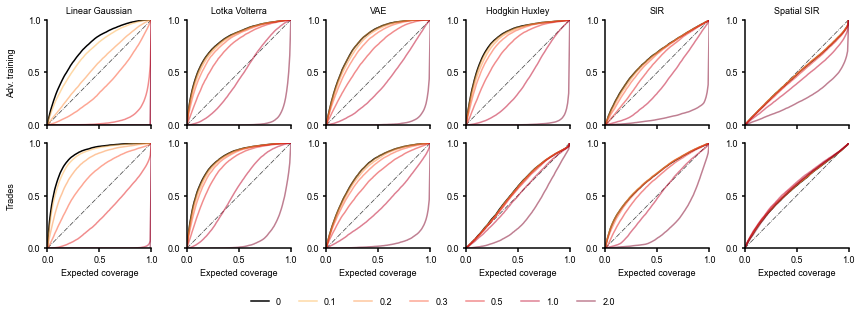

In [22]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "defense", plot_expected_coverage,
                            figsize_per_row=figsize_row_expected_cov, figsize_per_col=figsize_col,task=task, id=idxs_final,defense=defense[1:], color_map=color_map_eps, with_eps=True, with_grid=False, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
    fig.savefig("main_plot_coverage_fKL.svg")
    plt.show()

{'verbose': False, 'N_train': 1000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 1000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 1000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRo

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


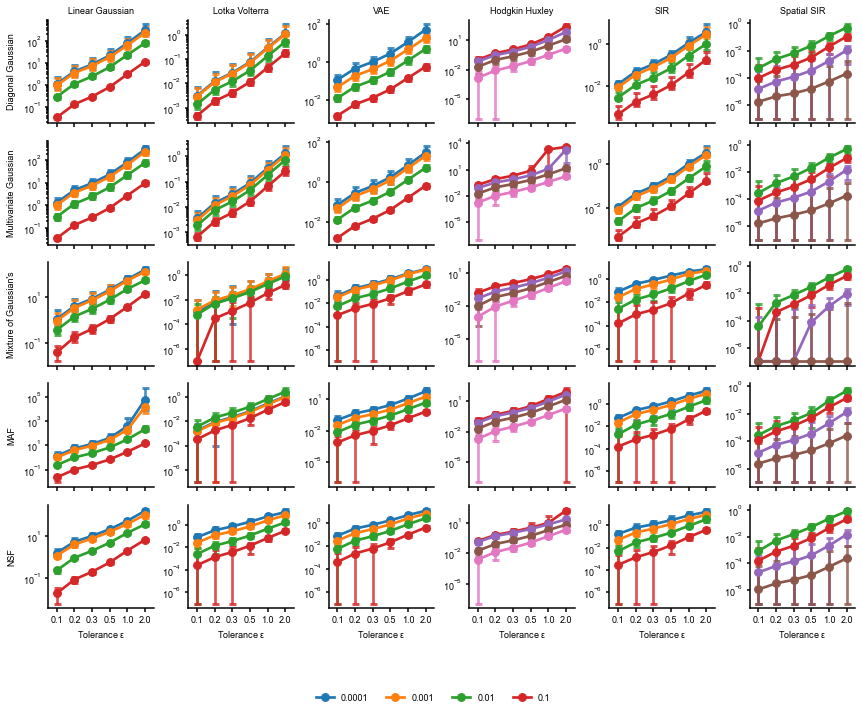

{'verbose': False, 'N_train': 10000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 10000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 10000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseK

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


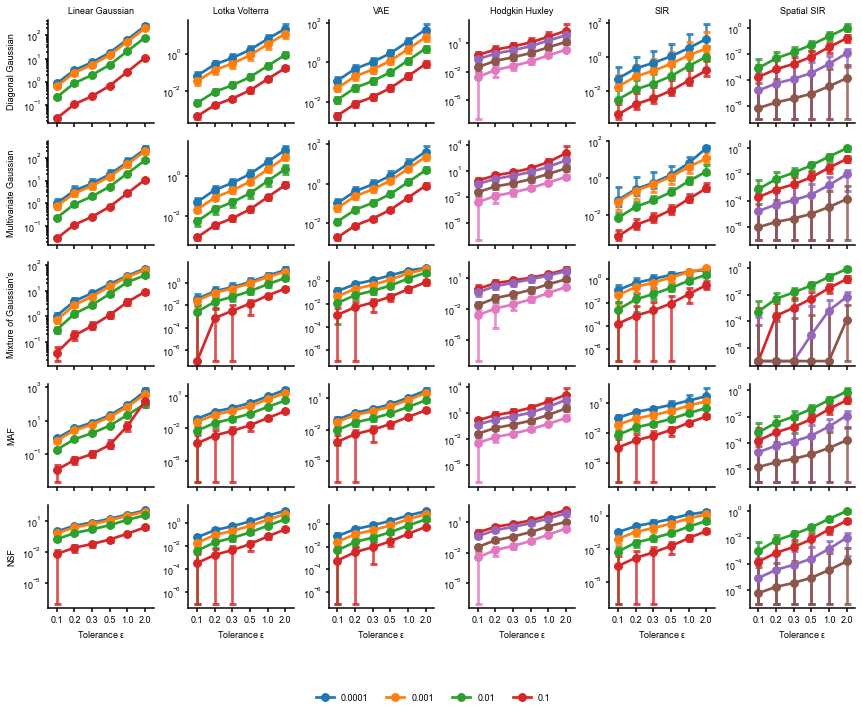

{'verbose': False, 'N_train': 100000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 100000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 100000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'Rever

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


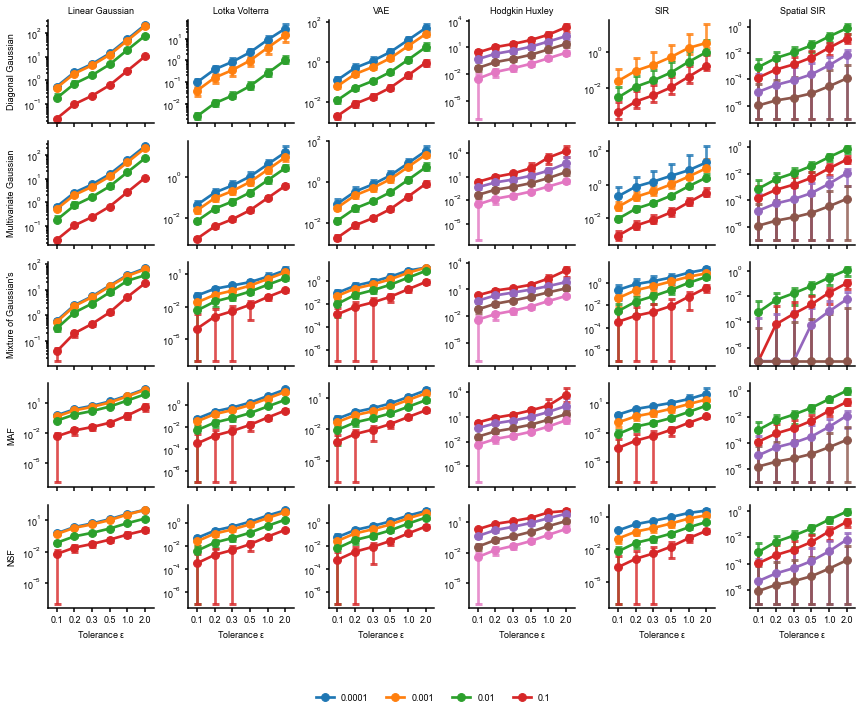

In [23]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, verbose=False, N_train=n, task=task, hue="params_defense_beta", defense="FIMTraceRegularizer",
                                legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ReverseKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"fim_trace_defense_task_models_hyperparameter_n{n}_rKL.svg")
        plt.show()

{'verbose': False, 'N_train': 1000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 1000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 1000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRo

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


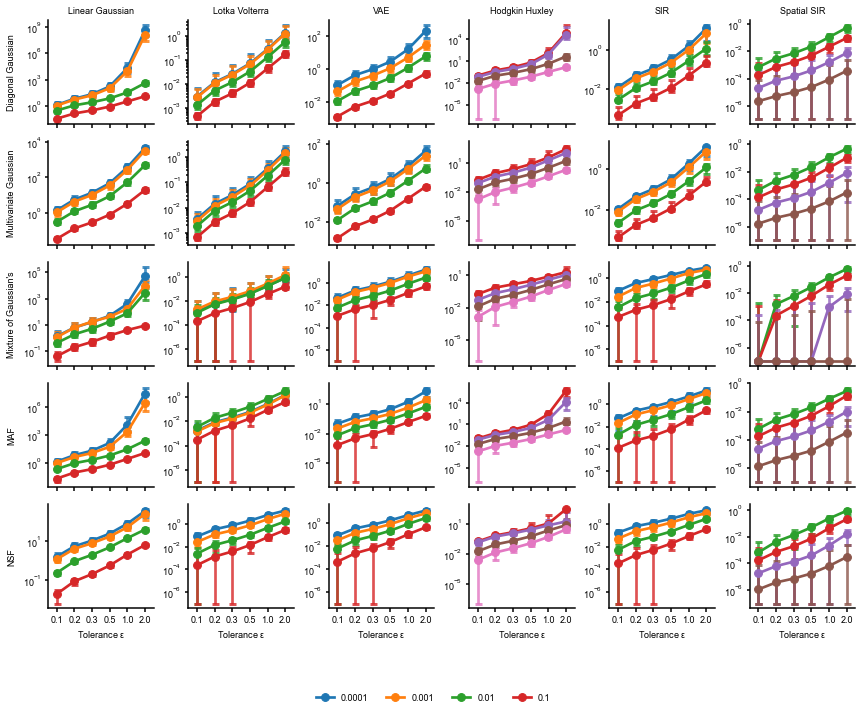

{'verbose': False, 'N_train': 10000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 10000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 10000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardK

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


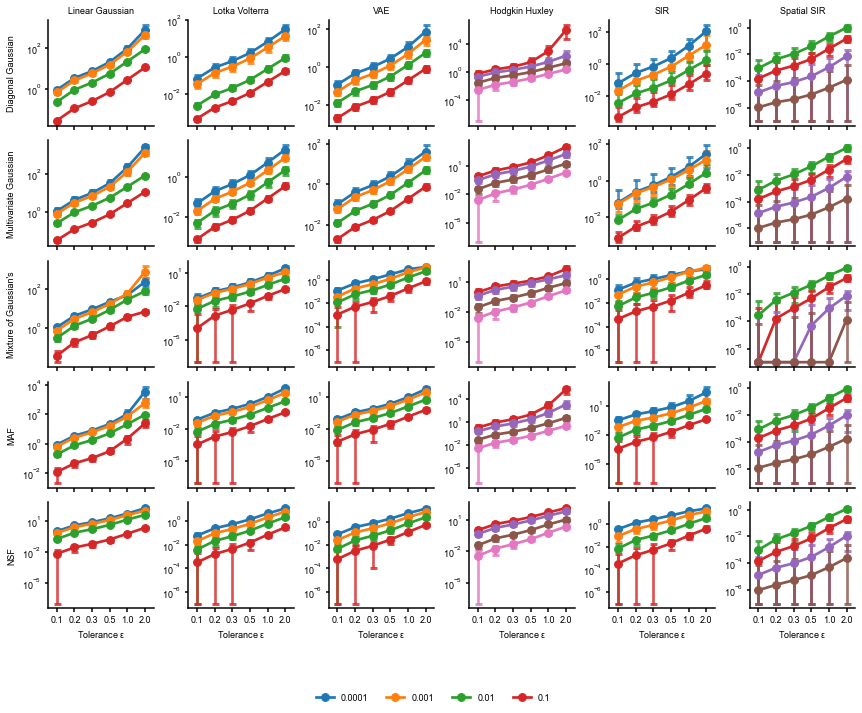

{'verbose': False, 'N_train': 100000, 'task': 'gaussian_linear', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 100000, 'task': 'lotka_volterra', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'gaussian'}
{'verbose': False, 'N_train': 100000, 'task': 'vae_task', 'hue': 'params_defense_beta', 'defense': 'FIMTraceRegularizer', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'Forwa

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


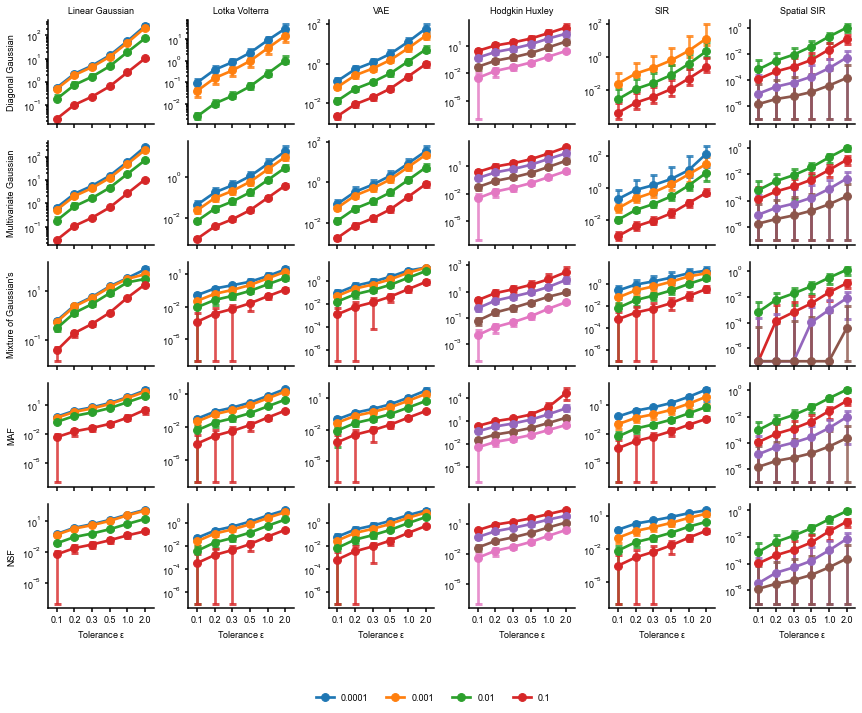

In [24]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, verbose=False,figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob,
                                N_train=n, task=task, hue="params_defense_beta", defense="FIMTraceRegularizer", legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ForwardKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"fim_trace_defense_task_models_hyperparameter_n{n}_fKL.svg")
        plt.show()

{'verbose': False, 'task': 'gaussian_linear', 'N_train': 1000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'lotka_volterra', 'N_train': 1000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'vae_task', 'N_train': 1000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'c

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


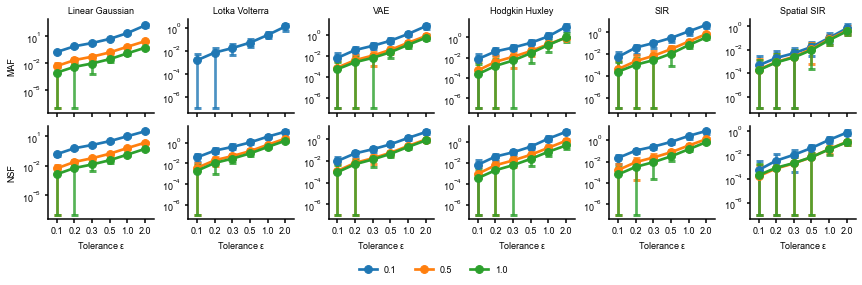

{'verbose': False, 'task': 'gaussian_linear', 'N_train': 10000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'lotka_volterra', 'N_train': 10000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'vae_task', 'N_train': 10000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


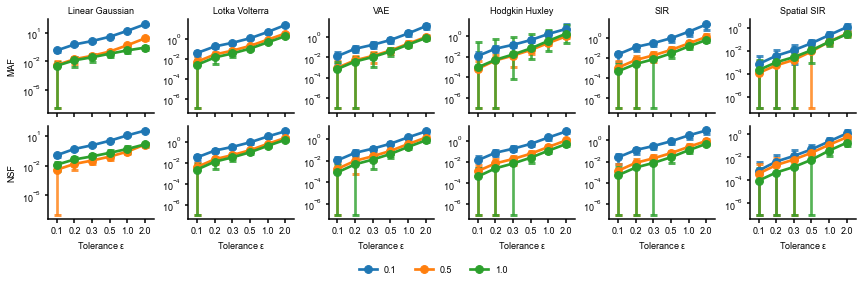

{'verbose': False, 'task': 'gaussian_linear', 'N_train': 100000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'lotka_volterra', 'N_train': 100000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'task': 'vae_task', 'N_train': 100000, 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


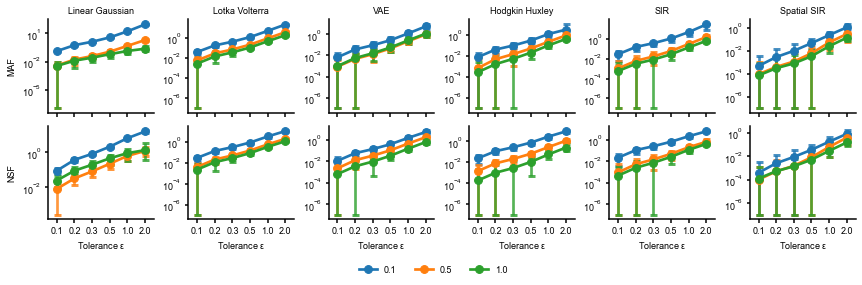

In [25]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, verbose=False, task=task,figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, N_train=n, hue="params_defense_eps", defense="L2PGDrKLTrades",
                                legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ForwardKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"l2pgdTrades_defense_task_models_hyperparameter_n{n}_fKL.svg")
        plt.show()

{'verbose': False, 'N_train': 1000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'c

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


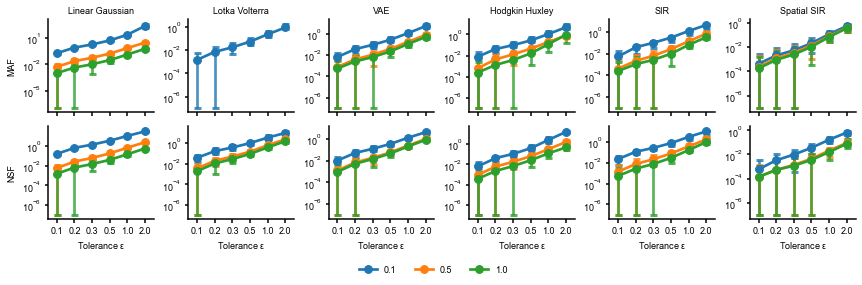

{'verbose': False, 'N_train': 10000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


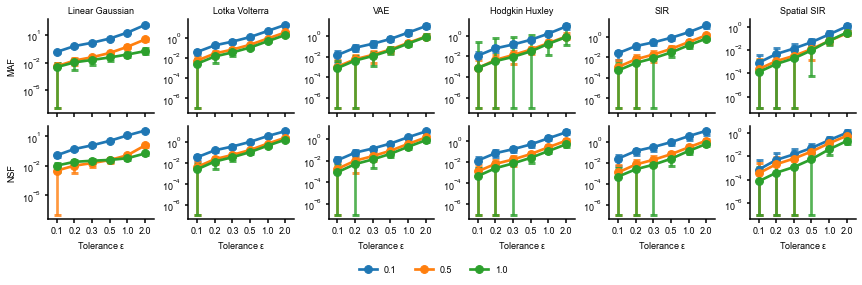

{'verbose': False, 'N_train': 100000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDrKLTrades', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


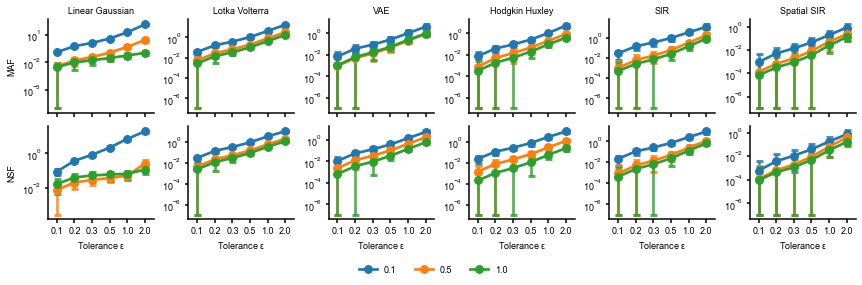

In [26]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, verbose=False, N_train=n, task=task, hue="params_defense_eps", defense="L2PGDrKLTrades", figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob,
                               legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ReverseKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"l2pgdTrades_defense_task_models_hyperparameter_n{n}_rKL.svg")
        plt.show()

{'verbose': False, 'N_train': 1000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


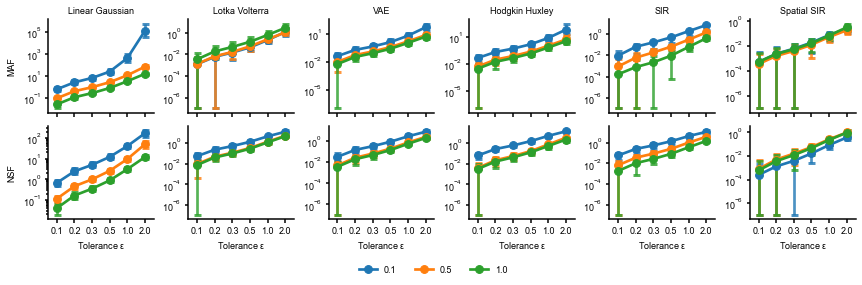

{'verbose': False, 'N_train': 10000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': Tru

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


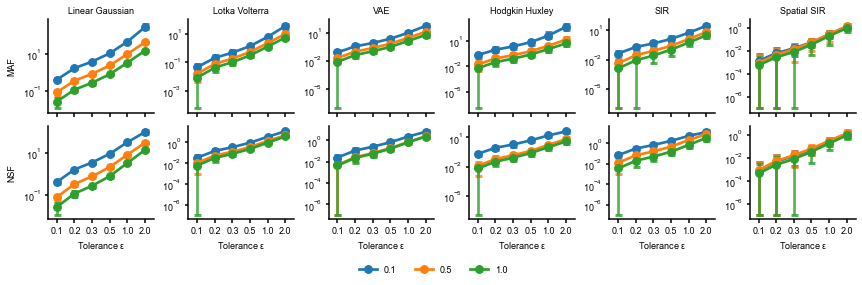

{'verbose': False, 'N_train': 100000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ForwardKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


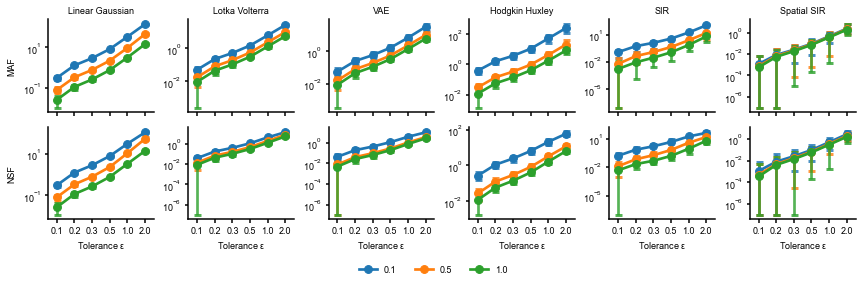

In [27]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, verbose=False,figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, N_train=n, task=task, hue="params_defense_eps", defense="L2PGDTargetedAdversarialTraining", 
                               legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ForwardKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"l2pgdAdvTrain_defense_task_models_hyperparameter_n{n}_fKL.svg")
        plt.show()

{'verbose': False, 'N_train': 1000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 1000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


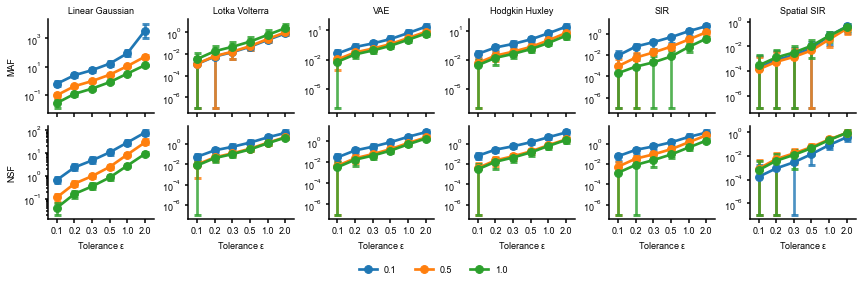

{'verbose': False, 'N_train': 10000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 10000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': Tru

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


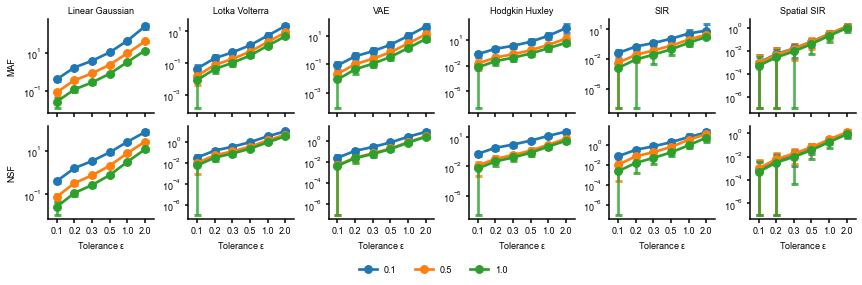

{'verbose': False, 'N_train': 100000, 'task': 'gaussian_linear', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'lotka_volterra', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': True, 'metric_rob': 'ReverseKLRobMetric', 'plot_kwargs': {'color_map': {0.0001: 'C0', 0.001: 'C1', 0.01: 'C3', 0.1: 'C4', 0.5: 'C5', 1.0: 'C6', 10.0: 'C7', 100.0: 'C8'}}, 'model_name': 'maf'}
{'verbose': False, 'N_train': 100000, 'task': 'vae_task', 'hue': 'params_defense_eps', 'defense': 'L2PGDTargetedAdversarialTraining', 'legend': False, 'attack': 'L2PGDAttack', 'expand_params_defense': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


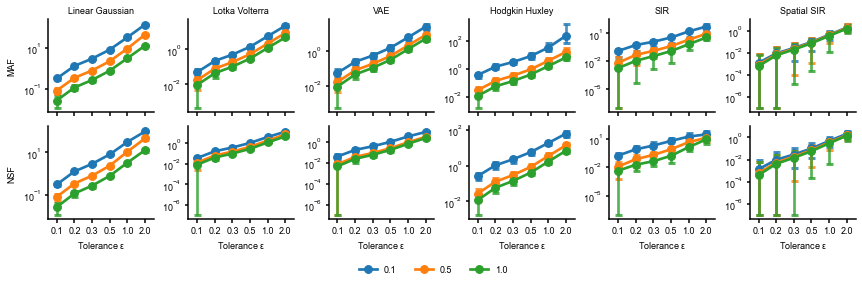

In [28]:
for n in [1000,10000,100000]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, verbose=False, N_train=n, task=task, hue="params_defense_eps",figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob,
                                defense="L2PGDTargetedAdversarialTraining", legend=False,attack="L2PGDAttack", expand_params_defense=True, metric_rob="ReverseKLRobMetric", plot_kwargs={"color_map":color_map})   
        fig.savefig(f"l2pgdAdvTrain_defense_task_models_hyperparameter_n{n}_rKL.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': T

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


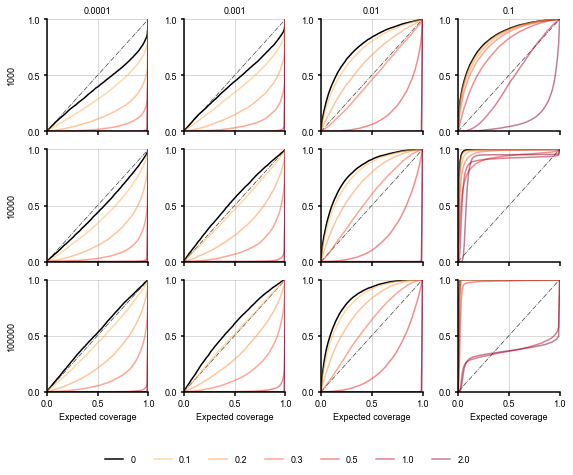

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NL

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


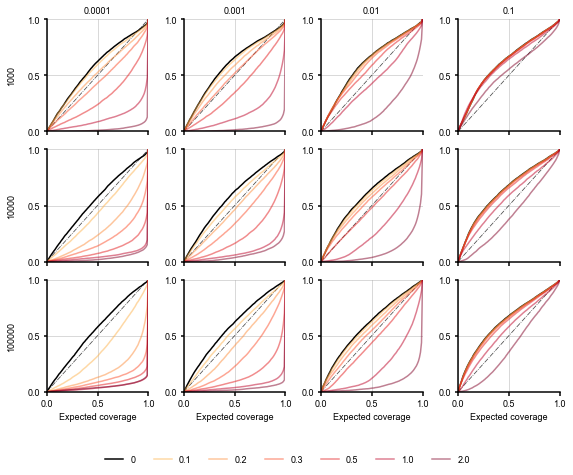

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True,

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


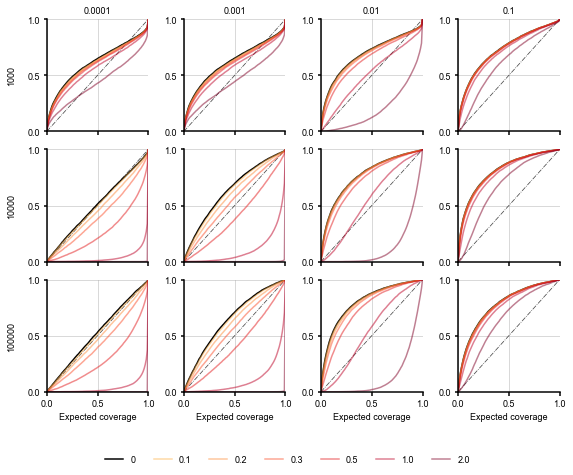

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 10.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


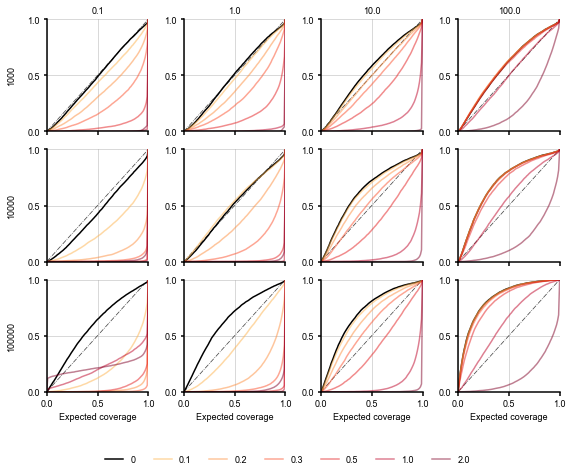

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'v

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


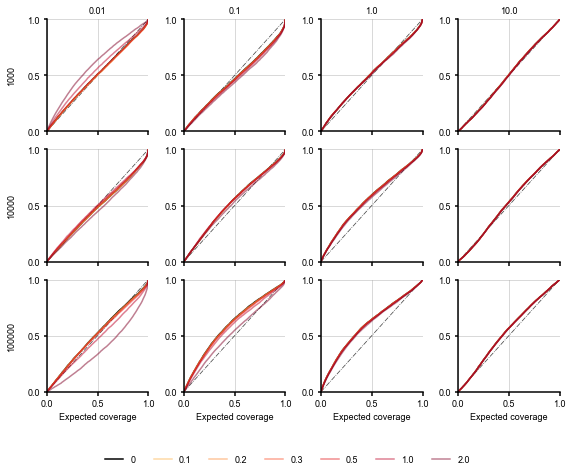

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


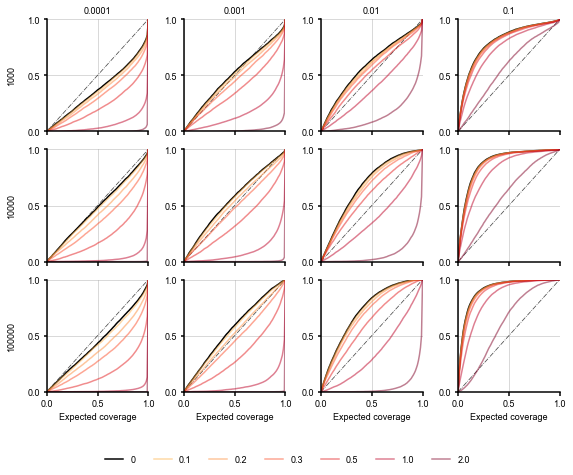

In [29]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_beta", "N_train", plot_expected_coverage, task=task, 
        model_name="maf", expand_params_defense=True, defense="FIMTraceRegularizer", figsize_per_col=figsize_col, 
        color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_fisher_defense_rKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': T

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


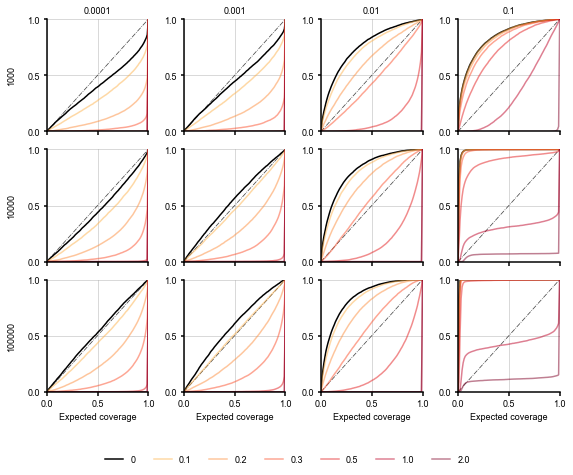

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NL

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


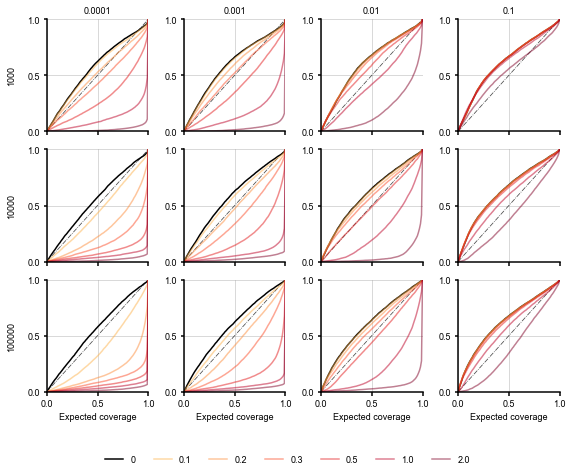

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True,

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


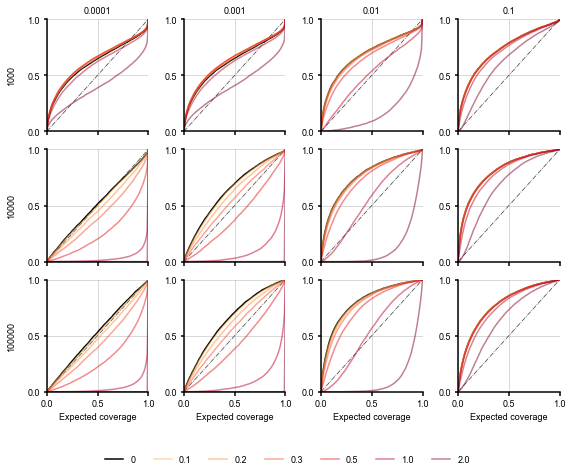

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 10.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


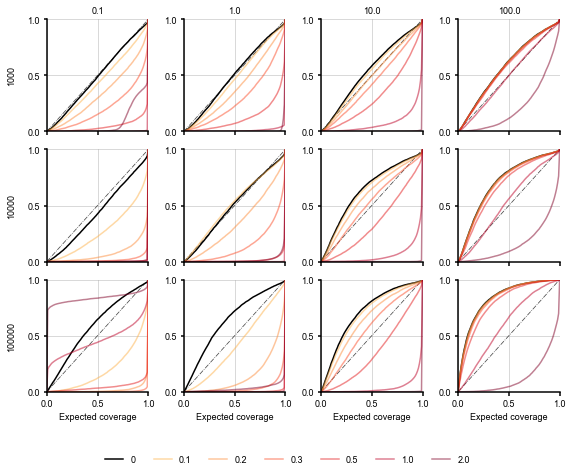

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'v

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


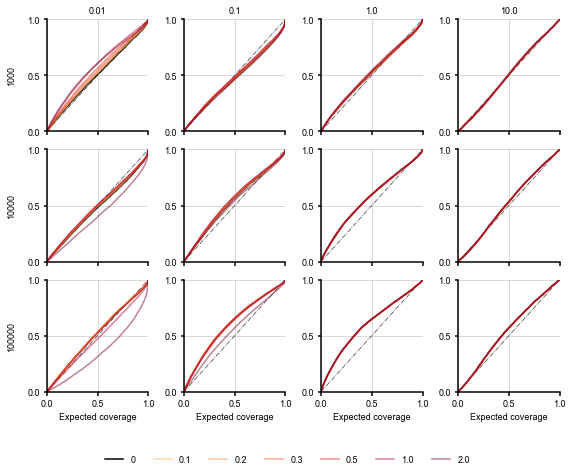

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.0001, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.001, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_beta': 0.01, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'FIMTraceRegularizer', 'with_eps': True, 'hue': 'eps', 'verbose'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


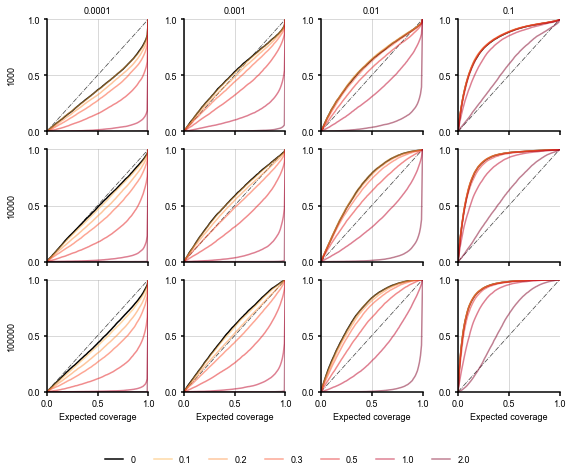

In [30]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_beta", "N_train", plot_expected_coverage, task=task, 
        model_name="maf", expand_params_defense=True, defense="FIMTraceRegularizer", figsize_per_col=figsize_col, 
        color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_fisher_defense_fKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose':

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


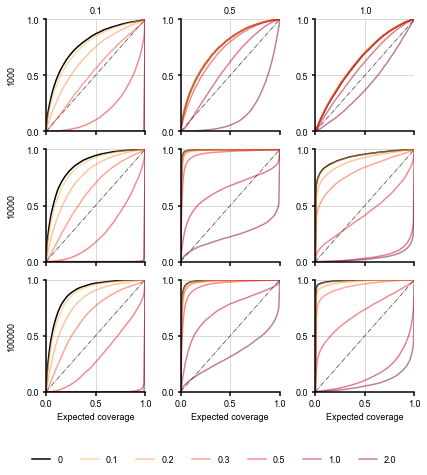

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'Forwar

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


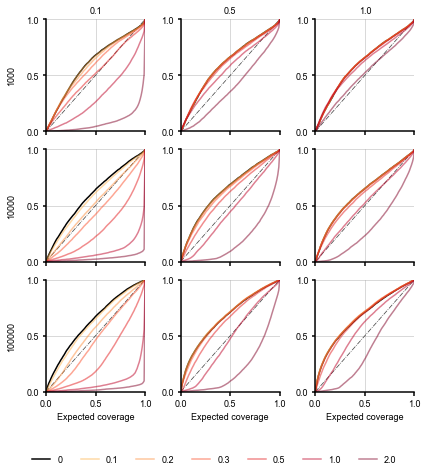

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


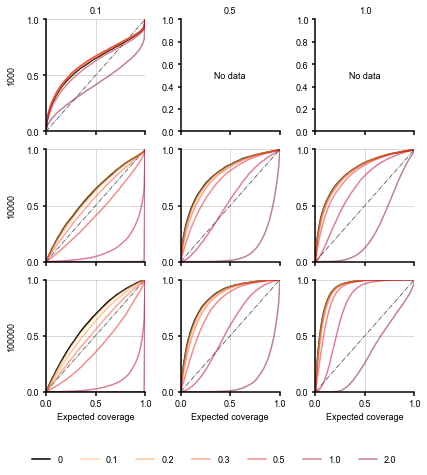

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': Fal

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


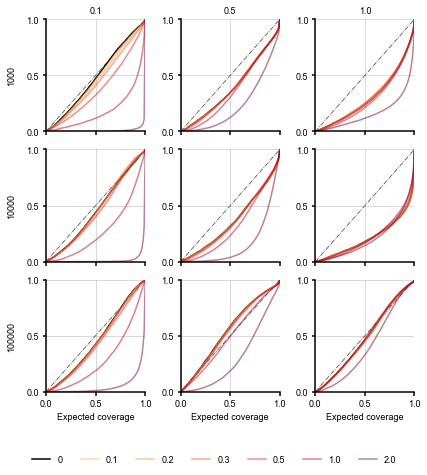

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


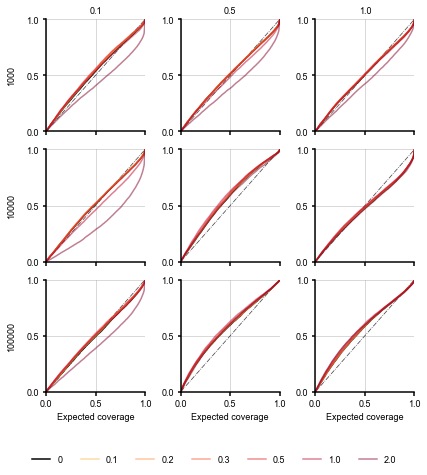

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', '

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


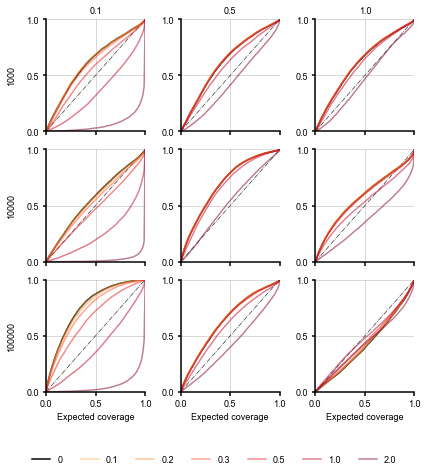

In [31]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_eps", "N_train", plot_expected_coverage, task=task, model_name="maf", expand_params_defense=True,
                                defense="L2PGDrKLTrades", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_l2pgdTrades_fKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose':

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


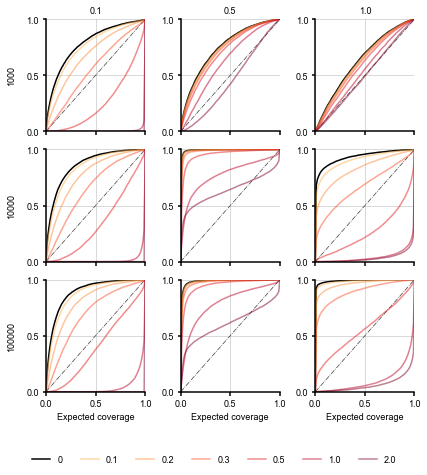

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'Revers

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


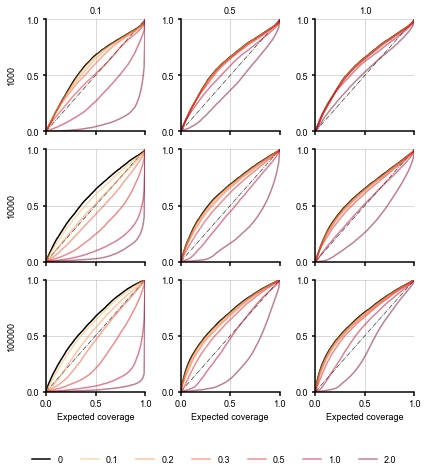

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


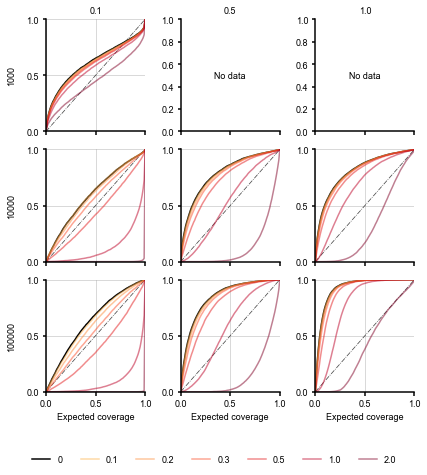

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': Fal

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


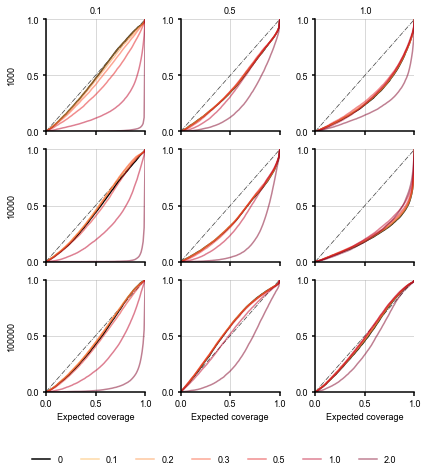

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


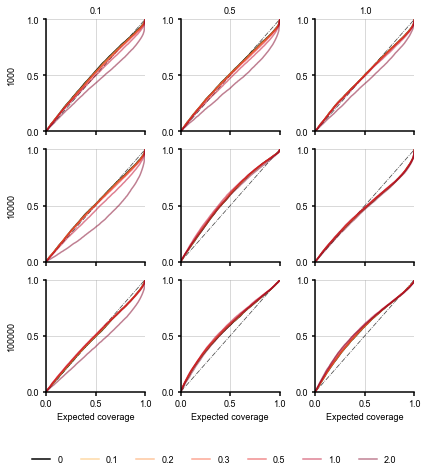

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', '

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


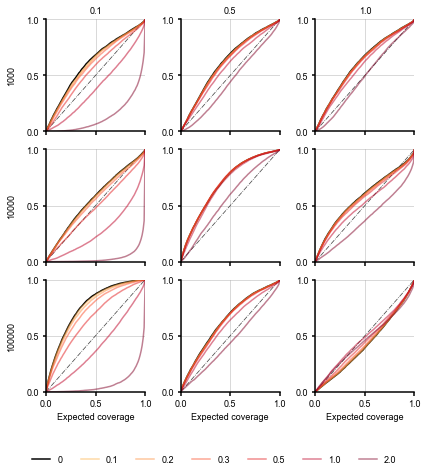

In [32]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_eps", "N_train", plot_expected_coverage, task=task, model_name="maf", expand_params_defense=True,
                                defense="L2PGDrKLTrades", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_l2pgdTrades_rKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGD

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


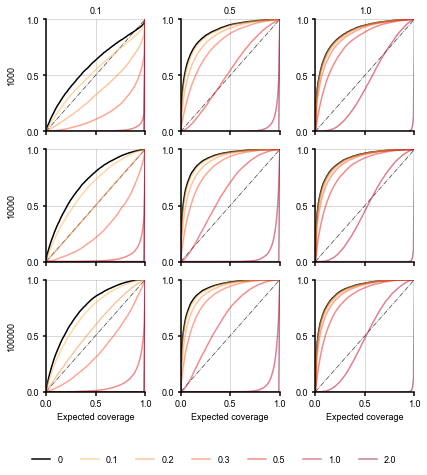

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


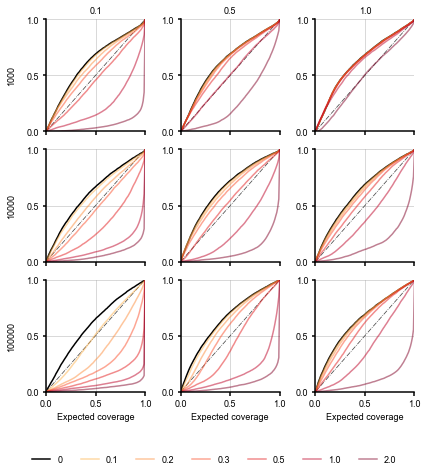

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTarg

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


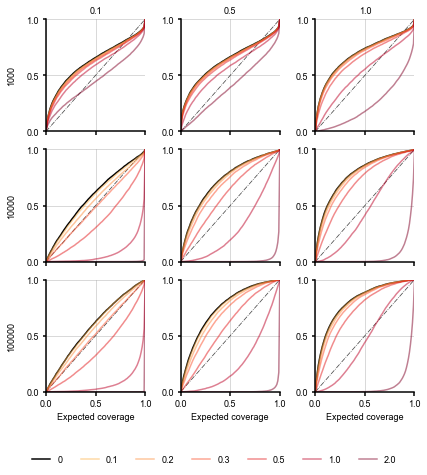

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTarg

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


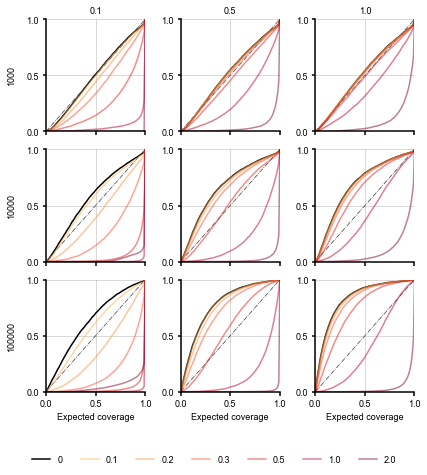

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversar

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


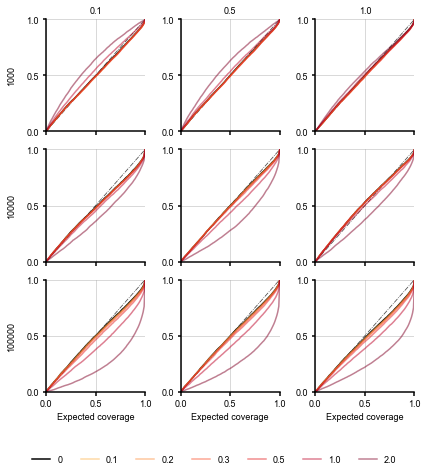

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


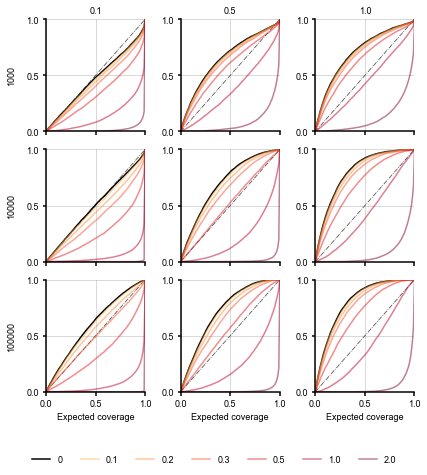

In [33]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_eps", "N_train", plot_expected_coverage, task=task, model_name="maf", expand_params_defense=True,
                                defense="L2PGDTargetedAdversarialTraining", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", 
                                verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_l2AdvTrain_rKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGD

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


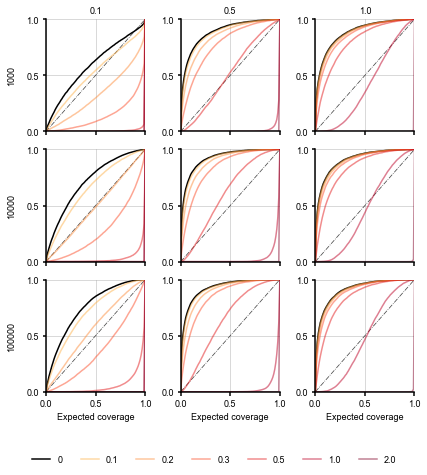

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


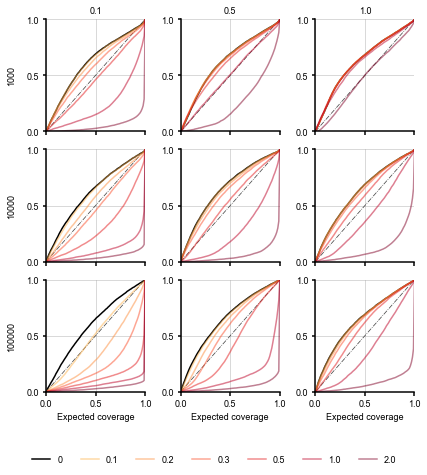

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTarg

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


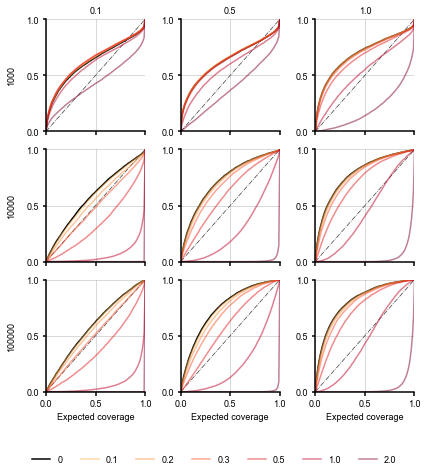

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTarg

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


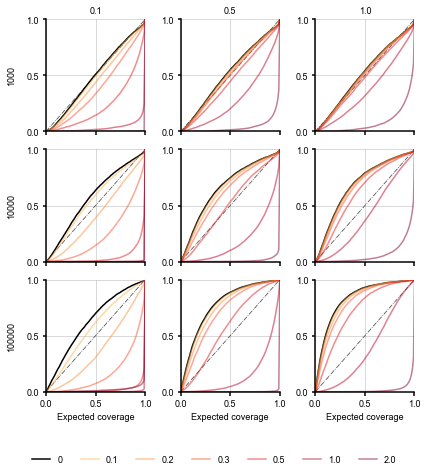

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversar

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


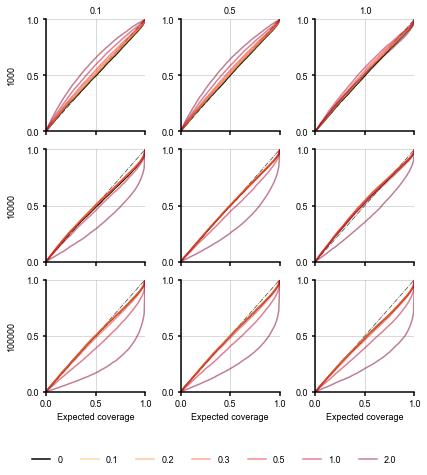

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDTargetedAdversarialTraining'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


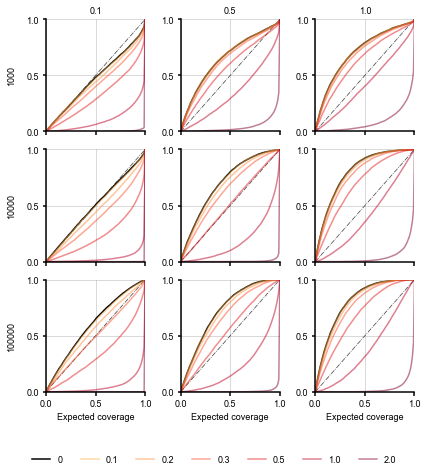

In [34]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_eps", "N_train", plot_expected_coverage, task=task, model_name="maf", expand_params_defense=True,
                                defense="L2PGDTargetedAdversarialTraining", figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov, with_eps=True, hue="eps", 
                                verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_l2AdvTrain_fKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()

{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'gaussian_linear', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose':

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


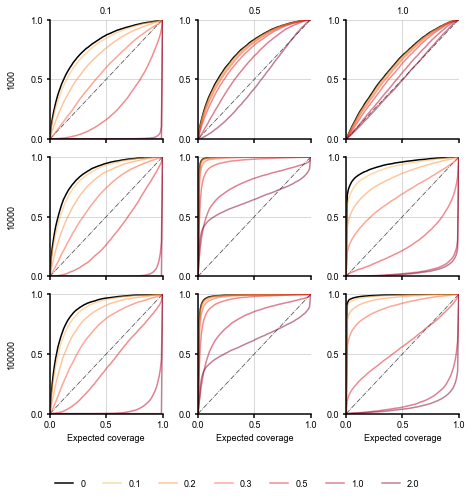

{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'Revers

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


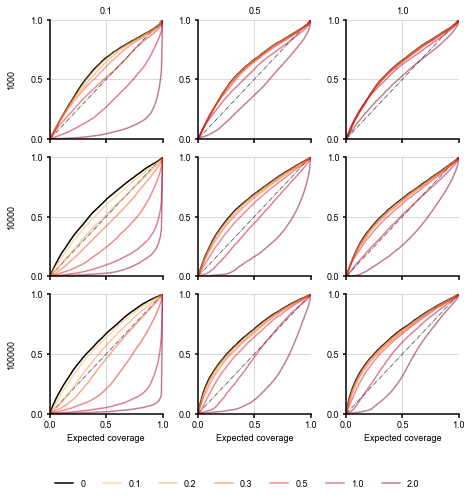

{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
No data for these keywords....
{'task': 'lotka_volterra', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


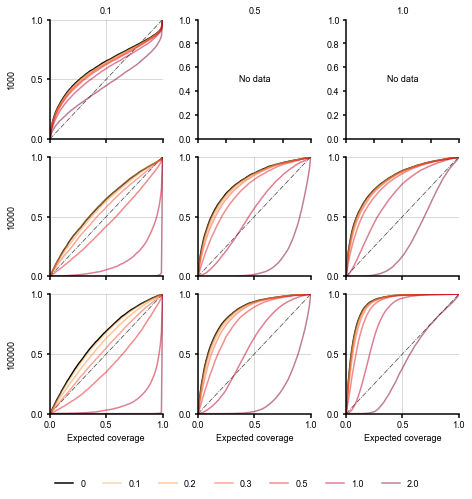

{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'hudgkin_huxley', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': Fal

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


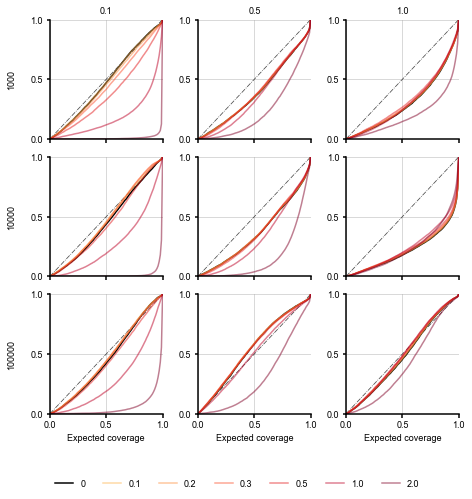

{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'spatial_sir', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


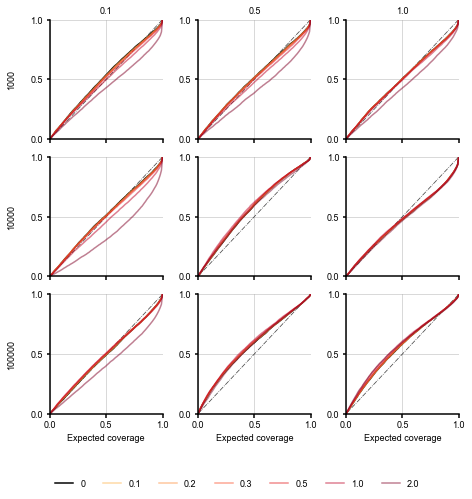

{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.1, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 0.5, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'params_defense_eps': 1.0, 'N_train': 1000}
{'task': 'vae_task', 'model_name': 'maf', 'expand_params_defense': True, 'defense': 'L2PGDrKLTrades', 'with_eps': True, 'hue': 'eps', 'verbose': False, 'loss': 'NLLLoss', '

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


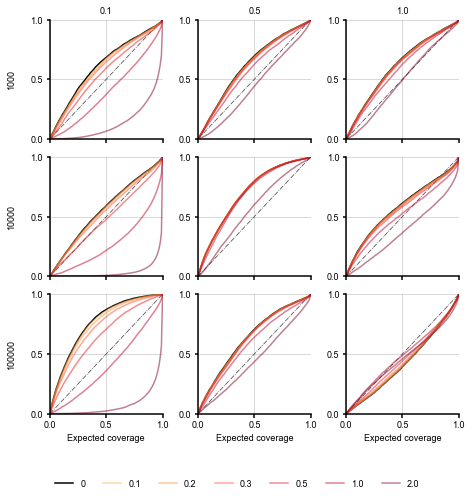

In [35]:
for task in ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "spatial_sir", "vae_task"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "params_defense_eps", "N_train", plot_expected_coverage, 
                               task=task, model_name="maf", expand_params_defense=True, 
                               defense="L2PGDrKLTrades", figsize_per_col=2.2, 
                               color_map=color_map_eps, figsize_per_row=2.1, with_eps=True,
                                hue="eps", verbose=False, loss="NLLLoss", 
                                 metric_rob="ReverseKLRobMetric", attack="L2PGDAttack")
        fig.savefig(f"expected_coverages_l2pgdrKLTrades_rKL_l2pgd_{task}_by_hyperparameter.svg")
        plt.show()